In [3]:
!pip install torch transformers numpy scikit-learn matplotlib

# Wartości $e_i$ w macierzy embedding w modelu GPT-2

Projekt z algebry liniowej – analiza matematycznych podstaw działania modelu GPT-2, ze szczególnym uwzględnieniem macierzy embedding oraz własności geometrycznych wektorów.

### 1. Czym jest $e_i$ w macierzy embedding

W modelach językowych takich jak GPT-2 każdy token (czyli fragment tekstu, np. słowo lub jego część) jest reprezentowany przez wektor liczb rzeczywistych. Wektor ten nazywamy **wektorem embeddingu**.

Jeżeli embedding danego tokenu ma postać:

$$\mathbf{e} = (e_1, e_2, e_3, \dots, e_d)$$

to każda wartość $e_i$ oznacza **i-tą współrzędną tego wektora**. Jest to pojedyncza liczba rzeczywista opisująca udział tokenu w pewnej abstrakcyjnej cesze znaczeniowej.

W GPT-2 wymiar wektora embeddingu wynosi zazwyczaj $d = 768$, co oznacza, że każdy token opisany jest przez 768 wartości $e_i$.

### 2. Czym jest macierz embedding

**Macierz embedding** to macierz, która zawiera wektory embeddingów dla wszystkich tokenów w słowniku modelu.

Matematycznie można ją zapisać jako:

$$E \in \mathbb{R}^{V \times d}$$

gdzie:
- $V$ – liczba tokenów w słowniku,
- $d$ – wymiar wektora embeddingu.

Każdy **wiersz macierzy** odpowiada jednemu tokenowi, a każda **kolumna** jednej wartości $e_i$.

In [12]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from transformers import GPT2Model, GPT2Tokenizer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## 3. Jak działają wartości $e_i$ (aspekt obliczeniowy)

Wartości $e_i$ nie mają z góry ustalonego znaczenia i nie są interpretowalne wprost przez człowieka. Są one **wyuczone automatycznie** podczas treningu GPT-2. Każda wartość $e_i$ reprezentuje pewien ukryty wymiar semantyczny.

Z punktu widzenia algebry liniowej istotne jest to, że:
- pojedyncze $e_i$ nie niesie pełnej informacji,
- znaczenie tokenu zawarte jest w **całym wektorze embeddingu**,
- podobieństwo tokenów można mierzyć za pomocą miar geometrycznych.

In [18]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2")
model.eval()

tokens = ["kot", "pies", "lew", "samochod", "komputer", "Jezus", "Hitler"]

def get_embedding(token):
    tid = tokenizer.encode(token, add_special_tokens=False)[0]
    return model.wte.weight[tid].detach()

emb = {t: get_embedding(t) for t in tokens}

## 4. Geometryczne porównanie embeddingów (PCA 2D i 3D)

Rozważmy przykład teoretyczny porówania współrzędnych $e_i$ dla uproszczonego wymiaru:

| Token | $e_1$ | $e_2$ | $e_3$ |
|------|------|------|------|
| kot | 0.81 | -0.12 | 0.54 |
| pies | 0.78 | -0.10 | 0.51 |
| samochód | -0.33 | 0.92 | -0.61 |

Poniżej wykonamy rzeczywistą redukcję wymiarowości z $d=768$ do 2D i 3D, aby zobaczyć te relacje geometryczne.

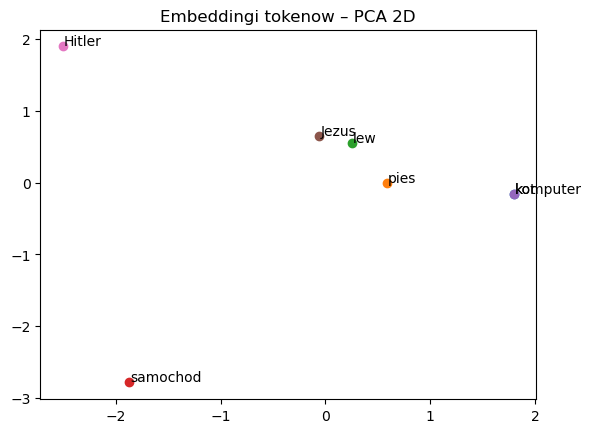

In [19]:
X = np.array([emb[t].numpy() for t in tokens])

pca2 = PCA(n_components=2)
X2 = pca2.fit_transform(X)

plt.figure()
for i, t in enumerate(tokens):
    plt.scatter(X2[i,0], X2[i,1])
    plt.text(X2[i,0]+0.01, X2[i,1]+0.01, t)
plt.title("Embeddingi tokenow – PCA 2D")
plt.show()

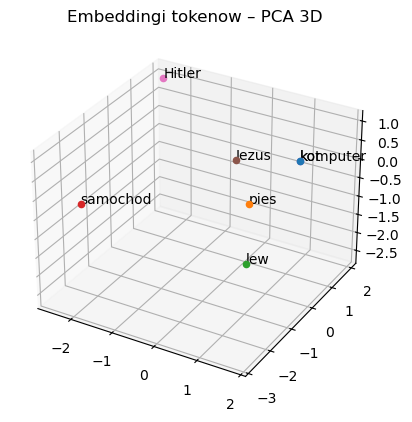

In [10]:
pca3 = PCA(n_components=3)
X3 = pca3.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for i, t in enumerate(tokens):
    ax.scatter(X3[i,0], X3[i,1], X3[i,2])
    ax.text(X3[i,0], X3[i,1], X3[i,2], t)

ax.set_title("Embeddingi tokenow – PCA 3D")
plt.show()

## 5. Podobieństwo cosinusowe embeddingów

Zmiana tokenu powoduje zmianę wielu wartości $e_i$, co przesuwa punkt reprezentujący token w przestrzeni $\mathbb{R}^d$. Dzięki temu podobieństwo semantyczne odpowiada bliskości w przestrzeni.

In [20]:
sim_kot_pies = F.cosine_similarity(emb["kot"], emb["pies"], dim=0)
sim_kot_samochod = F.cosine_similarity(emb["kot"], emb["samochod"], dim=0)
sim_jezus_hitler = F.cosine_similarity(emb["Jezus"], emb["Hitler"], dim=0)

print("Cosine similarity kot–pies:", sim_kot_pies.item())
print("Cosine similarity kot–samochod:", sim_kot_samochod.item())
print("Cosine similarity Jezus–Hitler:", sim_jezus_hitler.item())

Cosine similarity kot–pies: 0.43910130858421326
Cosine similarity kot–samochod: 0.24835646152496338
Cosine similarity Jezus–Hitler: 0.29065561294555664


## 6. Podsumowanie – znaczenie embeddingów w GPT-2

Macierz embedding umożliwia przejście z reprezentacji dyskretnej (tokeny) do reprezentacji ciągłej. Embedding tokenu jest następnie łączony z embeddingiem pozycyjnym, co pozwala modelowi uwzględniać kolejność w zdaniu.

Z perspektywy algebry liniowej uczenie modelu polega na takim przekształcaniu tej przestrzeni, aby relacje semantyczne odpowiadały relacjom geometrycznym (chmura punktów w przestrzeni wielowymiarowej).